<a href="https://colab.research.google.com/github/walledhany/House_price_kaggel/blob/main/spaceship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt
from google.colab import files

In [ ]:
import sklearn


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [ ]:
uploaded = files.upload()


Saving test.csv to test (3).csv
Saving train.csv to train (3).csv


In [ ]:
train=pd.read_csv('train.csv')

In [ ]:
test=pd.read_csv('test.csv')

In [ ]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
test


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [ ]:
all_data=pd.concat((train,test))

In [ ]:
all_data.isna().sum()

,0
PassengerId,0
HomePlanet,288
CryoSleep,310
Cabin,299
Destination,274
Age,270
VIP,296
RoomService,263
FoodCourt,289
ShoppingMall,306


In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.5+ MB


In [ ]:
numeric_data=all_data.select_dtypes(include='number')
numeric_data.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Age,1.000000,0.067300,0.124447,0.034959,0.118992,0.101441
RoomService,0.067300,1.000000,-0.020146,0.057402,0.008936,-0.023847
FoodCourt,0.124447,-0.020146,1.000000,-0.001589,0.228990,0.244279
ShoppingMall,0.034959,0.057402,-0.001589,1.000000,0.010504,0.004485
Spa,0.118992,0.008936,0.228990,0.010504,1.000000,0.149874
VRDeck,0.101441,-0.023847,0.244279,0.004485,0.149874,1.000000


In [ ]:
catregis=all_data.select_dtypes(include='object')

In [ ]:
numeric_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


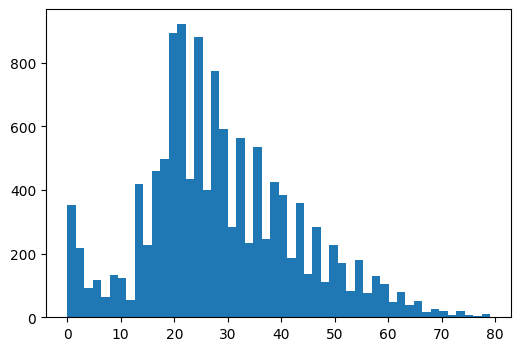

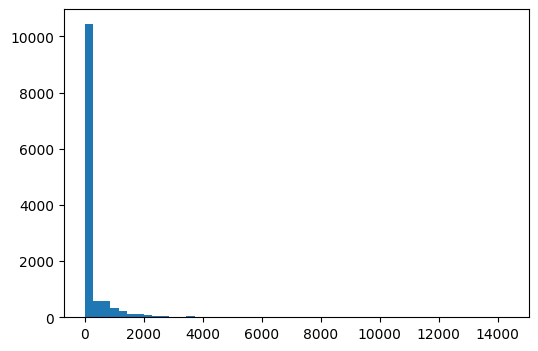

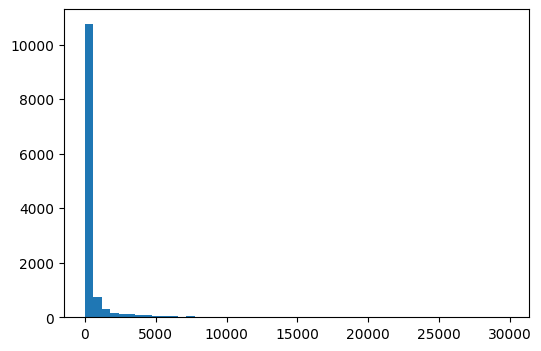

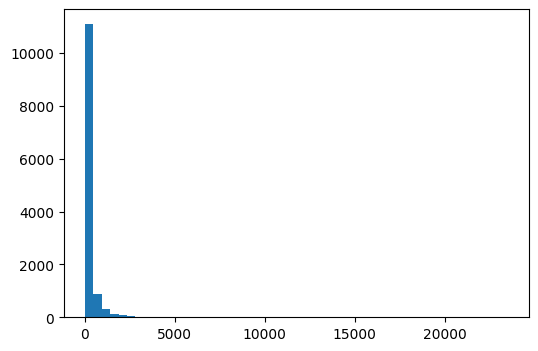

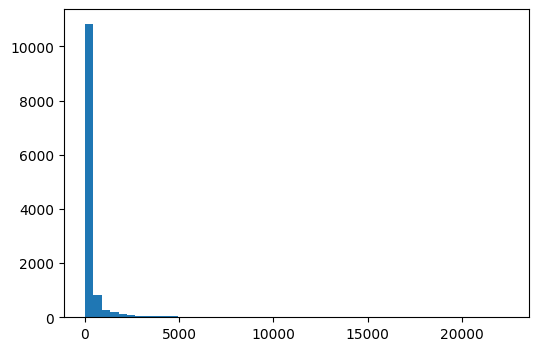

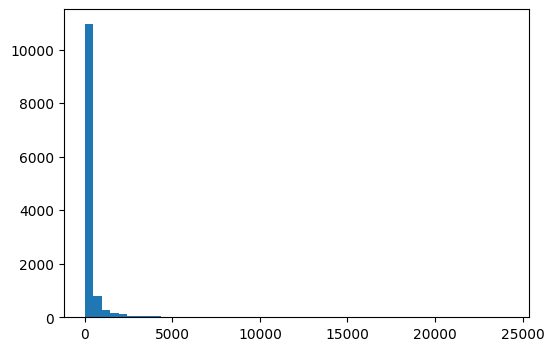

In [ ]:
for  col in numeric_data:
    plt.figure(figsize=(6, 4))
    plt.hist(all_data[col].dropna(), bins=50)

In [ ]:
numeric_data.skew()

,0
Age,0.440150
RoomService,6.140174
FoodCourt,7.051971
ShoppingMall,11.009090
Spa,7.653169
VRDeck,8.059793


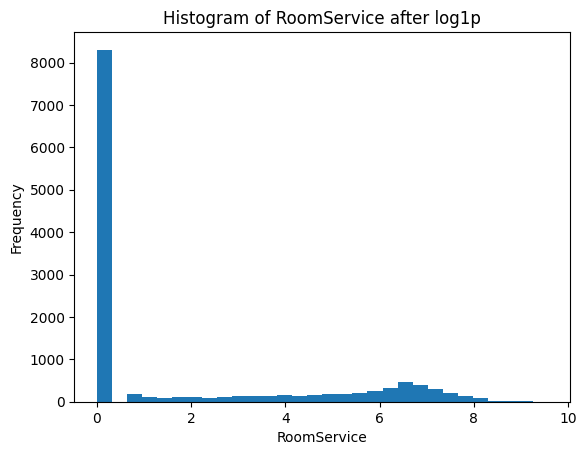

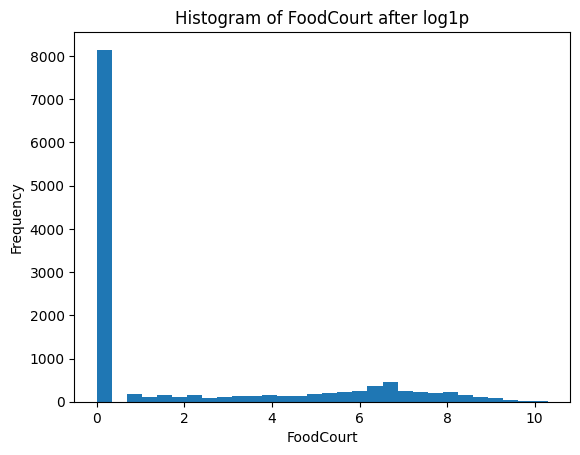

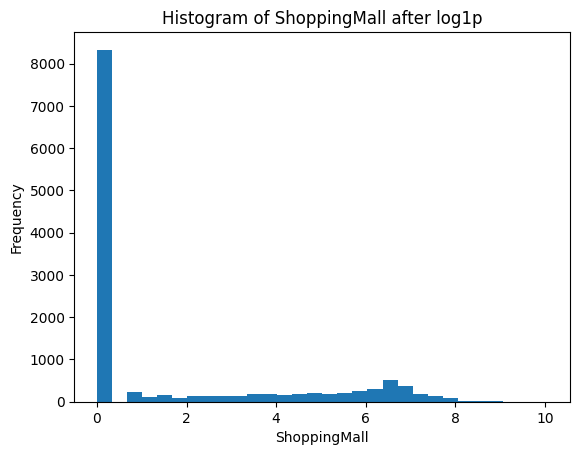

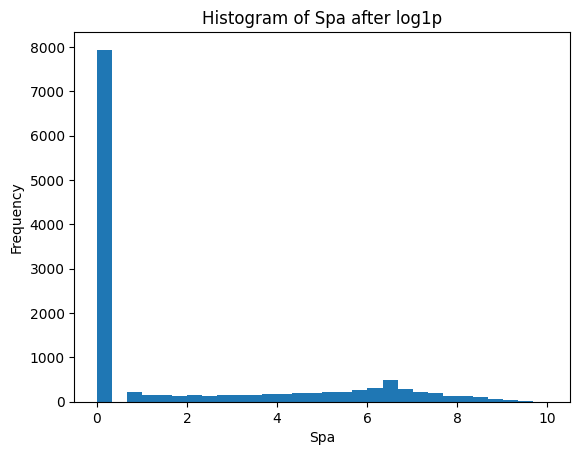

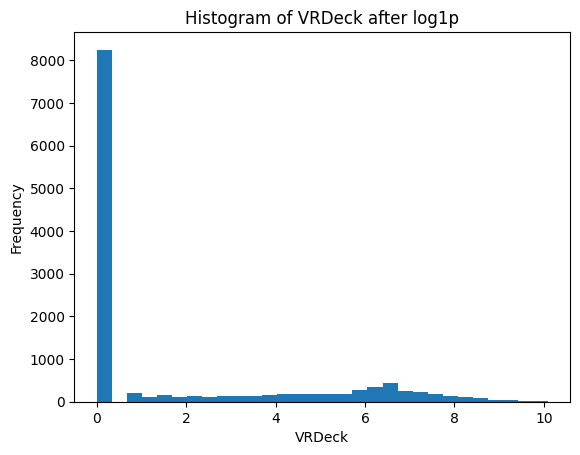

In [ ]:
for col in ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']:
    all_data[col] = np.log1p(all_data[col])   # تحويل لوغاريتمي آمن
    plt.hist(all_data[col].dropna(), bins=30)
    plt.title(f'Histogram of {col} after log1p')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
numeric_data

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...
4272,34.0,0.0,0.0,0.0,0.0,0.0
4273,42.0,0.0,847.0,17.0,10.0,144.0
4274,NaN,0.0,0.0,0.0,0.0,0.0
4275,NaN,0.0,2680.0,0.0,0.0,523.0


In [ ]:
all_data. skew( numeric_only=True)

,0
Age,0.440150
RoomService,1.110295
FoodCourt,1.108825
ShoppingMall,1.193605
Spa,1.093918
VRDeck,1.182601


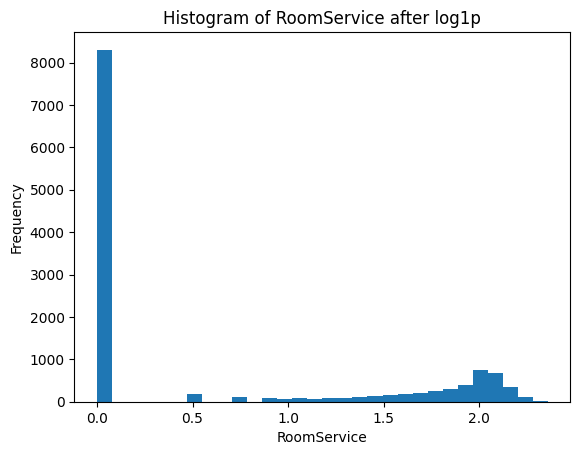

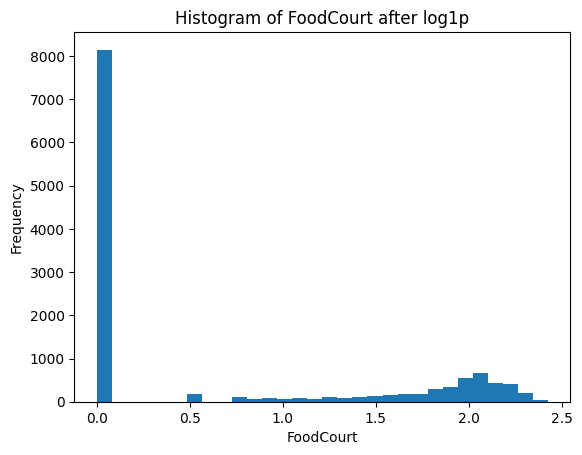

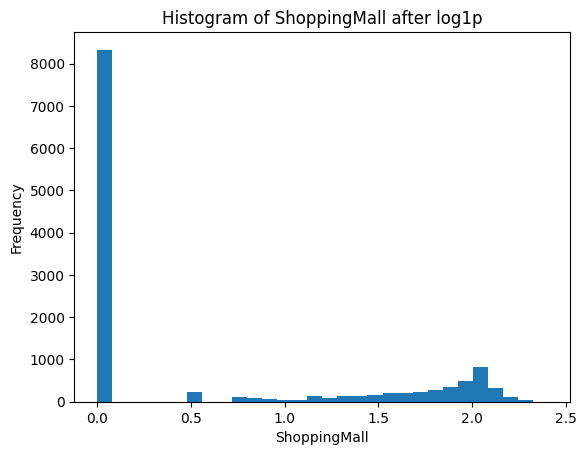

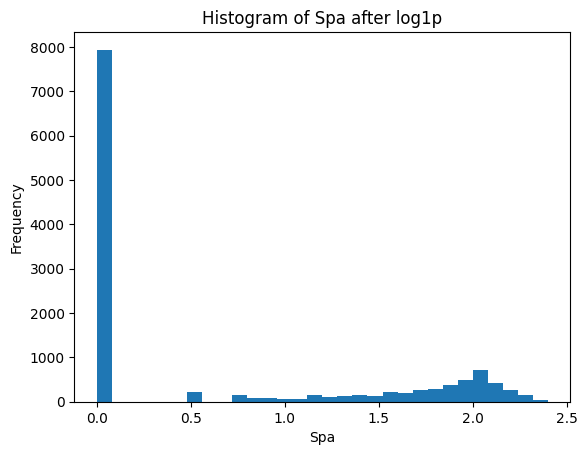

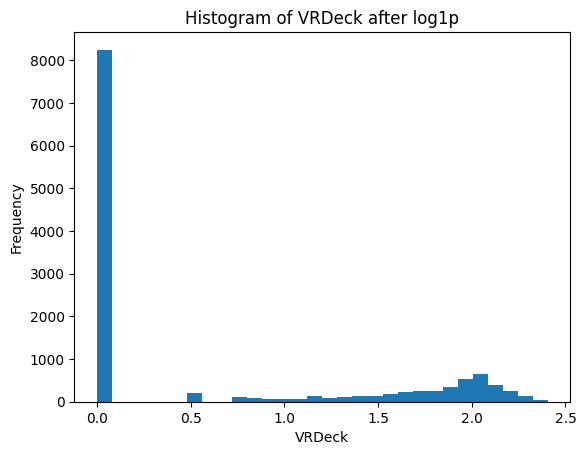

In [ ]:
for col in ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']:
    all_data[col] = np.log1p(all_data[col])   # تحويل لوغاريتمي آمن
    plt.hist(all_data[col].dropna(), bins=30)
    plt.title(f'Histogram of {col} after log1p')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:


data= all_data.select_dtypes(include='number')
data.skew()


,0
Age,0.440150
RoomService,0.859304
FoodCourt,0.816702
ShoppingMall,0.907082
Spa,0.770585
VRDeck,0.869030


In [ ]:
all_data['Transported'].value_counts()


,count
Transported,
True,4378
False,4315


In [ ]:
all_data.isna().sum()

,0
PassengerId,0
HomePlanet,288
CryoSleep,310
Cabin,299
Destination,274
Age,270
VIP,296
RoomService,263
FoodCourt,289
ShoppingMall,306


In [ ]:
all_data0=all_data[all_data['Transported'].notna()]
all_data0

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.000000,0.000000,0.000000,0.000000,0.000000,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,1.740550,1.194706,1.448822,1.989232,1.570003,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,1.565317,2.217276,0.000000,2.283631,1.591686,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.000000,2.098967,1.934256,2.209453,1.835435,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,1.904646,1.660640,1.795732,1.993147,0.741276,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.000000,2.285196,0.000000,2.128813,1.671001,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.000000,0.000000,0.000000,0.000000,0.000000,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.000000,0.000000,2.144210,0.526589,0.000000,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.000000,2.073995,0.000000,1.927062,2.206305,Celeon Hontichre,False


In [ ]:
all_data0.isna().sum()

,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


In [ ]:
print(all_data0.shape)

(8693, 14)


In [ ]:
y=all_data0['Transported']


In [ ]:
categorical_data=all_data0.select_dtypes(include='object')

In [ ]:
categorical_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines,True
...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,True,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,False,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,False,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,False,Celeon Hontichre,False


In [ ]:
categorical_data = categorical_data.drop('Transported', axis=1 ,errors='ignore')


In [ ]:
categorical_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines
...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,True,Gravior Noxnuther
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,False,Kurta Mondalley
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,False,Fayey Connon
8691,9280_01,Europa,False,E/608/S,55 Cancri e,False,Celeon Hontichre


In [ ]:
categorical_data_0 =categorical_data.columns
categorical_data_0

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name'],
      dtype='object')

In [ ]:
numeric_data_0=numeric_data.columns

In [ ]:
numeric_data

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...
4272,34.0,0.0,0.0,0.0,0.0,0.0
4273,42.0,0.0,847.0,17.0,10.0,144.0
4274,NaN,0.0,0.0,0.0,0.0,0.0
4275,NaN,0.0,2680.0,0.0,0.0,523.0


In [ ]:
categorical_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines
...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,True,Gravior Noxnuther
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,False,Kurta Mondalley
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,False,Fayey Connon
8691,9280_01,Europa,False,E/608/S,55 Cancri e,False,Celeon Hontichre


In [ ]:
numeric_data

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...
4272,34.0,0.0,0.0,0.0,0.0,0.0
4273,42.0,0.0,847.0,17.0,10.0,144.0
4274,NaN,0.0,0.0,0.0,0.0,0.0
4275,NaN,0.0,2680.0,0.0,0.0,523.0


In [ ]:
categorical_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines
...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,True,Gravior Noxnuther
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,False,Kurta Mondalley
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,False,Fayey Connon
8691,9280_01,Europa,False,E/608/S,55 Cancri e,False,Celeon Hontichre


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [ ]:
numeric_features= Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),('scaler', StandardScaler())])


In [ ]:
categorical_transformer=Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent'))])

In [ ]:
preprocessor =ColumnTransformer( transformers=[('num',numeric_features,numeric_data_0),('cat',categorical_transformer,categorical_data_0)])


In [ ]:
clean_data=preprocessor.fit_transform(all_data0)

clean_data=pd. DataFrame(clean_data,index=all_data0.index,columns=list(numeric_data_0)+list(categorical_data_0))

In [ ]:
clean_data

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,0.711945,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy
1,-0.334037,1.344645,0.643952,1.075336,1.573323,1.135345,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines
2,2.036857,1.140711,1.794275,-0.670153,1.912621,1.160562,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent
3,0.293552,-0.680981,1.661185,1.660169,1.827129,1.444043,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent
4,-0.891895,1.535617,1.168097,1.49328,1.577835,0.171535,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.85141,-0.680981,1.870681,-0.670153,1.734191,1.252806,9276_01,Europa,False,A/98/P,55 Cancri e,True,Gravior Noxnuther
8689,-0.752431,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,9278_01,Earth,True,G/1499/S,PSO J318.5-22,False,Kurta Mondalley
8690,-0.194573,-0.680981,-0.700012,1.913115,-0.112389,-0.690571,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,False,Fayey Connon
8691,0.22382,-0.680981,1.633094,-0.670153,1.501671,1.875365,9280_01,Europa,False,E/608/S,55 Cancri e,False,Celeon Hontichre


In [ ]:
all_data0.iloc[:,:13]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.000000,0.000000,0.000000,0.000000,0.000000,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,1.740550,1.194706,1.448822,1.989232,1.570003,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,1.565317,2.217276,0.000000,2.283631,1.591686,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.000000,2.098967,1.934256,2.209453,1.835435,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,1.904646,1.660640,1.795732,1.993147,0.741276,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.000000,2.285196,0.000000,2.128813,1.671001,Gravior Noxnuther
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.000000,0.000000,0.000000,0.000000,0.000000,Kurta Mondalley
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.000000,0.000000,2.144210,0.526589,0.000000,Fayey Connon
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.000000,2.073995,0.000000,1.927062,2.206305,Celeon Hontichre


In [ ]:
clean_data.isna().sum()

,0
Age,0
RoomService,0
FoodCourt,0
ShoppingMall,0
Spa,0
VRDeck,0
PassengerId,0
HomePlanet,0
CryoSleep,0
Cabin,0


In [ ]:
clean_data

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,0.711945,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy
1,-0.334037,1.344645,0.643952,1.075336,1.573323,1.135345,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines
2,2.036857,1.140711,1.794275,-0.670153,1.912621,1.160562,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent
3,0.293552,-0.680981,1.661185,1.660169,1.827129,1.444043,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent
4,-0.891895,1.535617,1.168097,1.49328,1.577835,0.171535,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.85141,-0.680981,1.870681,-0.670153,1.734191,1.252806,9276_01,Europa,False,A/98/P,55 Cancri e,True,Gravior Noxnuther
8689,-0.752431,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,9278_01,Earth,True,G/1499/S,PSO J318.5-22,False,Kurta Mondalley
8690,-0.194573,-0.680981,-0.700012,1.913115,-0.112389,-0.690571,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,False,Fayey Connon
8691,0.22382,-0.680981,1.633094,-0.670153,1.501671,1.875365,9280_01,Europa,False,E/608/S,55 Cancri e,False,Celeon Hontichre


In [ ]:
clean_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693,8693,8693,8693,8693,8693,8693
unique,80.000000,1273.000000,1507.000000,1115.000000,1327.000000,1306.000000,8693,3,2,6560,3,2,8473
top,-0.124841,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,9280_02,Earth,False,G/734/S,TRAPPIST-1e,False,Alraium Disivering
freq,438.000000,5758.000000,5639.000000,5795.000000,5507.000000,5683.000000,1,4803,5656,207,6097,8494,202


In [ ]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Age           8693 non-null   object
 1   RoomService   8693 non-null   object
 2   FoodCourt     8693 non-null   object
 3   ShoppingMall  8693 non-null   object
 4   Spa           8693 non-null   object
 5   VRDeck        8693 non-null   object
 6   PassengerId   8693 non-null   object
 7   HomePlanet    8693 non-null   object
 8   CryoSleep     8693 non-null   object
 9   Cabin         8693 non-null   object
 10  Destination   8693 non-null   object
 11  VIP           8693 non-null   object
 12  Name          8693 non-null   object
dtypes: object(13)
memory usage: 1.2+ MB


In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.5+ MB


In [ ]:
clean_data['Age']=pd.to_numeric(clean_data ['Age'], errors='coerce')


In [ ]:
clean_data['RoomService']=pd.to_numeric(clean_data ['RoomService'], errors='coerce')



In [ ]:
clean_data['FoodCourt']=pd.to_numeric(clean_data ['FoodCourt'], errors='coerce')

In [ ]:
clean_data['ShoppingMall']=pd.to_numeric(clean_data ['ShoppingMall'], errors='coerce')

In [ ]:
clean_data['Spa']=pd.to_numeric(clean_data ['Spa'], errors='coerce')

In [ ]:
clean_data['VRDeck']=pd.to_numeric(clean_data ['VRDeck'], errors='coerce')

In [ ]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           8693 non-null   float64
 1   RoomService   8693 non-null   float64
 2   FoodCourt     8693 non-null   float64
 3   ShoppingMall  8693 non-null   float64
 4   Spa           8693 non-null   float64
 5   VRDeck        8693 non-null   float64
 6   PassengerId   8693 non-null   object 
 7   HomePlanet    8693 non-null   object 
 8   CryoSleep     8693 non-null   object 
 9   Cabin         8693 non-null   object 
 10  Destination   8693 non-null   object 
 11  VIP           8693 non-null   object 
 12  Name          8693 non-null   object 
dtypes: float64(6), object(7)
memory usage: 1.2+ MB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Transported', ylabel='count'>

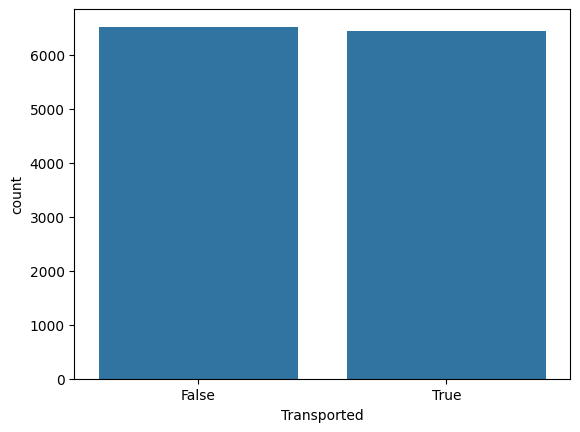

In [ ]:
sns.countplot(x='Transported',data=all_data)

<Axes: xlabel='HomePlanet', ylabel='Transported'>

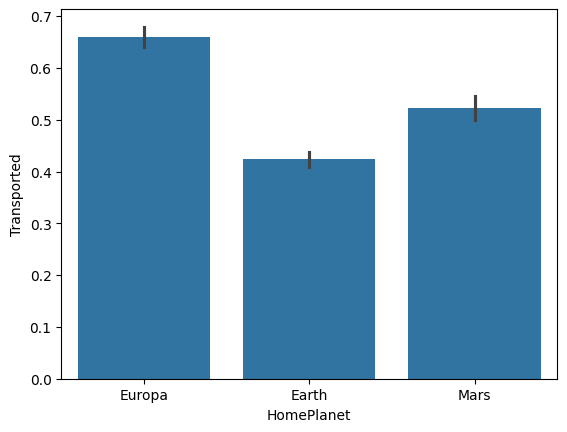

In [ ]:
sns.barplot(x='HomePlanet', y='Transported', data=train)

<Axes: xlabel='Transported', ylabel='Age'>

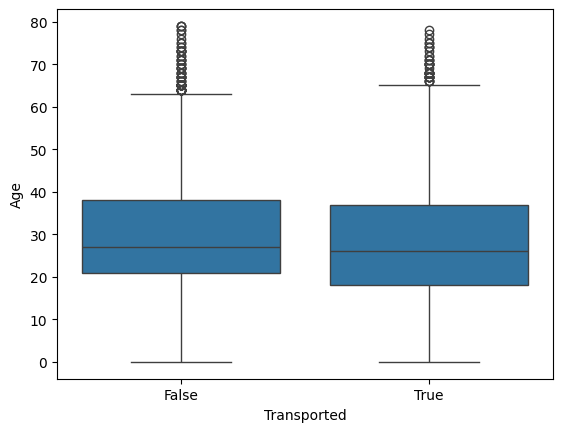

In [ ]:

sns.boxplot(x='Transported', y='Age', data=train)

In [ ]:
clean_data .info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           8693 non-null   float64
 1   RoomService   8693 non-null   float64
 2   FoodCourt     8693 non-null   float64
 3   ShoppingMall  8693 non-null   float64
 4   Spa           8693 non-null   float64
 5   VRDeck        8693 non-null   float64
 6   PassengerId   8693 non-null   object 
 7   HomePlanet    8693 non-null   object 
 8   CryoSleep     8693 non-null   object 
 9   Cabin         8693 non-null   object 
 10  Destination   8693 non-null   object 
 11  VIP           8693 non-null   object 
 12  Name          8693 non-null   object 
dtypes: float64(6), object(7)
memory usage: 1.2+ MB


In [ ]:
clean_data. columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name'],
      dtype='object')

In [ ]:
clean_data.drop(['Name','PassengerId'],axis=1,inplace=True)

In [ ]:
clean_data

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet,CryoSleep,Cabin,Destination,VIP
0,0.711945,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,Europa,False,B/0/P,TRAPPIST-1e,False
1,-0.334037,1.344645,0.643952,1.075336,1.573323,1.135345,Earth,False,F/0/S,TRAPPIST-1e,False
2,2.036857,1.140711,1.794275,-0.670153,1.912621,1.160562,Europa,False,A/0/S,TRAPPIST-1e,True
3,0.293552,-0.680981,1.661185,1.660169,1.827129,1.444043,Europa,False,A/0/S,TRAPPIST-1e,False
4,-0.891895,1.535617,1.168097,1.493280,1.577835,0.171535,Earth,False,F/1/S,TRAPPIST-1e,False
...,...,...,...,...,...,...,...,...,...,...,...
8688,0.851410,-0.680981,1.870681,-0.670153,1.734191,1.252806,Europa,False,A/98/P,55 Cancri e,True
8689,-0.752431,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,Earth,True,G/1499/S,PSO J318.5-22,False
8690,-0.194573,-0.680981,-0.700012,1.913115,-0.112389,-0.690571,Earth,False,G/1500/S,TRAPPIST-1e,False
8691,0.223820,-0.680981,1.633094,-0.670153,1.501671,1.875365,Europa,False,E/608/S,55 Cancri e,False


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
clean_data[['Deck','Cabin_num','side']]=clean_data['Cabin'].str.split("/",expand=True)

In [ ]:
clean_data['Cabin']

,Cabin
0,B/0/P
1,F/0/S
2,A/0/S
3,A/0/S
4,F/1/S
...,...
8688,A/98/P
8689,G/1499/S
8690,G/1500/S
8691,E/608/S


In [ ]:
##clean_data.drop('Cabin', axis=1, inplace=True)

In [ ]:
clean_data

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet,CryoSleep,Cabin,Destination,VIP,Deck,Cabin_num,side
0,0.711945,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,Europa,False,B/0/P,TRAPPIST-1e,False,B,0,P
1,-0.334037,1.344645,0.643952,1.075336,1.573323,1.135345,Earth,False,F/0/S,TRAPPIST-1e,False,F,0,S
2,2.036857,1.140711,1.794275,-0.670153,1.912621,1.160562,Europa,False,A/0/S,TRAPPIST-1e,True,A,0,S
3,0.293552,-0.680981,1.661185,1.660169,1.827129,1.444043,Europa,False,A/0/S,TRAPPIST-1e,False,A,0,S
4,-0.891895,1.535617,1.168097,1.493280,1.577835,0.171535,Earth,False,F/1/S,TRAPPIST-1e,False,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.851410,-0.680981,1.870681,-0.670153,1.734191,1.252806,Europa,False,A/98/P,55 Cancri e,True,A,98,P
8689,-0.752431,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,Earth,True,G/1499/S,PSO J318.5-22,False,G,1499,S
8690,-0.194573,-0.680981,-0.700012,1.913115,-0.112389,-0.690571,Earth,False,G/1500/S,TRAPPIST-1e,False,G,1500,S
8691,0.223820,-0.680981,1.633094,-0.670153,1.501671,1.875365,Europa,False,E/608/S,55 Cancri e,False,E,608,S


In [ ]:
clean_data[['Deck', 'Cabin_num', 'Side']] = clean_data['Cabin'].astype(str).str.split('/', expand=True)

In [ ]:
clean_data['TotalSpending']=clean_data[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1)

In [ ]:
clean_data.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Deck',
       'Cabin_num', 'side', 'Side', 'TotalSpending'],
      dtype='object')

In [ ]:
print(clean_data['Side'].head())

0    P
1    S
2    S
3    S
4    S
Name: Side, dtype: object


In [ ]:
print(clean_data['side'].head())

0    P
1    S
2    S
3    S
4    S
Name: side, dtype: object


In [ ]:
clean_data


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet,CryoSleep,Cabin,Destination,VIP,Deck,Cabin_num,side,Side,TotalSpending
0,0.711945,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,Europa,False,B/0/P,TRAPPIST-1e,False,B,0,P,P,-3.461005
1,-0.334037,1.344645,0.643952,1.075336,1.573323,1.135345,Earth,False,F/0/S,TRAPPIST-1e,False,F,0,S,S,5.772601
2,2.036857,1.140711,1.794275,-0.670153,1.912621,1.160562,Europa,False,A/0/S,TRAPPIST-1e,True,A,0,S,S,5.338015
3,0.293552,-0.680981,1.661185,1.660169,1.827129,1.444043,Europa,False,A/0/S,TRAPPIST-1e,False,A,0,S,S,5.911545
4,-0.891895,1.535617,1.168097,1.493280,1.577835,0.171535,Earth,False,F/1/S,TRAPPIST-1e,False,F,1,S,S,5.946364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.851410,-0.680981,1.870681,-0.670153,1.734191,1.252806,Europa,False,A/98/P,55 Cancri e,True,A,98,P,P,3.506544
8689,-0.752431,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,Earth,True,G/1499/S,PSO J318.5-22,False,G,1499,S,S,-3.461005
8690,-0.194573,-0.680981,-0.700012,1.913115,-0.112389,-0.690571,Earth,False,G/1500/S,TRAPPIST-1e,False,G,1500,S,S,-0.270838
8691,0.223820,-0.680981,1.633094,-0.670153,1.501671,1.875365,Europa,False,E/608/S,55 Cancri e,False,E,608,S,S,3.658994


In [ ]:
clean_data.drop('Side', axis=1, inplace=True)

In [ ]:
clean_data

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet,CryoSleep,Cabin,Destination,VIP,Deck,Cabin_num,side,TotalSpending
0,0.711945,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,Europa,False,B/0/P,TRAPPIST-1e,False,B,0,P,-3.461005
1,-0.334037,1.344645,0.643952,1.075336,1.573323,1.135345,Earth,False,F/0/S,TRAPPIST-1e,False,F,0,S,5.772601
2,2.036857,1.140711,1.794275,-0.670153,1.912621,1.160562,Europa,False,A/0/S,TRAPPIST-1e,True,A,0,S,5.338015
3,0.293552,-0.680981,1.661185,1.660169,1.827129,1.444043,Europa,False,A/0/S,TRAPPIST-1e,False,A,0,S,5.911545
4,-0.891895,1.535617,1.168097,1.493280,1.577835,0.171535,Earth,False,F/1/S,TRAPPIST-1e,False,F,1,S,5.946364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.851410,-0.680981,1.870681,-0.670153,1.734191,1.252806,Europa,False,A/98/P,55 Cancri e,True,A,98,P,3.506544
8689,-0.752431,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,Earth,True,G/1499/S,PSO J318.5-22,False,G,1499,S,-3.461005
8690,-0.194573,-0.680981,-0.700012,1.913115,-0.112389,-0.690571,Earth,False,G/1500/S,TRAPPIST-1e,False,G,1500,S,-0.270838
8691,0.223820,-0.680981,1.633094,-0.670153,1.501671,1.875365,Europa,False,E/608/S,55 Cancri e,False,E,608,S,3.658994


In [ ]:
clean_data.drop('Cabin',axis=1,inplace=True)


In [ ]:
clean_data.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Cabin_num',
       'side', 'TotalSpending'],
      dtype='object')

In [ ]:
clean_data


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet,CryoSleep,Destination,VIP,Deck,Cabin_num,side,TotalSpending
0,0.711945,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,Europa,False,TRAPPIST-1e,False,B,0,P,-3.461005
1,-0.334037,1.344645,0.643952,1.075336,1.573323,1.135345,Earth,False,TRAPPIST-1e,False,F,0,S,5.772601
2,2.036857,1.140711,1.794275,-0.670153,1.912621,1.160562,Europa,False,TRAPPIST-1e,True,A,0,S,5.338015
3,0.293552,-0.680981,1.661185,1.660169,1.827129,1.444043,Europa,False,TRAPPIST-1e,False,A,0,S,5.911545
4,-0.891895,1.535617,1.168097,1.493280,1.577835,0.171535,Earth,False,TRAPPIST-1e,False,F,1,S,5.946364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.851410,-0.680981,1.870681,-0.670153,1.734191,1.252806,Europa,False,55 Cancri e,True,A,98,P,3.506544
8689,-0.752431,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,Earth,True,PSO J318.5-22,False,G,1499,S,-3.461005
8690,-0.194573,-0.680981,-0.700012,1.913115,-0.112389,-0.690571,Earth,False,TRAPPIST-1e,False,G,1500,S,-0.270838
8691,0.223820,-0.680981,1.633094,-0.670153,1.501671,1.875365,Europa,False,55 Cancri e,False,E,608,S,3.658994


In [ ]:
clean_data['CryoSleep']=clean_data['CryoSleep'].map({True:1,False:0})


In [ ]:
clean_data['VIP']=clean_data['VIP'].map({True:1,False:0})

In [ ]:
clean_data

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet,CryoSleep,Destination,VIP,Deck,Cabin_num,side,TotalSpending
0,0.711945,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,Europa,0,TRAPPIST-1e,0,B,0,P,-3.461005
1,-0.334037,1.344645,0.643952,1.075336,1.573323,1.135345,Earth,0,TRAPPIST-1e,0,F,0,S,5.772601
2,2.036857,1.140711,1.794275,-0.670153,1.912621,1.160562,Europa,0,TRAPPIST-1e,1,A,0,S,5.338015
3,0.293552,-0.680981,1.661185,1.660169,1.827129,1.444043,Europa,0,TRAPPIST-1e,0,A,0,S,5.911545
4,-0.891895,1.535617,1.168097,1.493280,1.577835,0.171535,Earth,0,TRAPPIST-1e,0,F,1,S,5.946364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.851410,-0.680981,1.870681,-0.670153,1.734191,1.252806,Europa,0,55 Cancri e,1,A,98,P,3.506544
8689,-0.752431,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,Earth,1,PSO J318.5-22,0,G,1499,S,-3.461005
8690,-0.194573,-0.680981,-0.700012,1.913115,-0.112389,-0.690571,Earth,0,TRAPPIST-1e,0,G,1500,S,-0.270838
8691,0.223820,-0.680981,1.633094,-0.670153,1.501671,1.875365,Europa,0,55 Cancri e,0,E,608,S,3.658994


In [ ]:
clean_data.isna().sum().sum()

np.int64(0)

In [ ]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            8693 non-null   float64
 1   RoomService    8693 non-null   float64
 2   FoodCourt      8693 non-null   float64
 3   ShoppingMall   8693 non-null   float64
 4   Spa            8693 non-null   float64
 5   VRDeck         8693 non-null   float64
 6   HomePlanet     8693 non-null   object 
 7   CryoSleep      8693 non-null   int64  
 8   Destination    8693 non-null   object 
 9   VIP            8693 non-null   int64  
 10  Deck           8693 non-null   object 
 11  Cabin_num      8693 non-null   object 
 12  side           8693 non-null   object 
 13  TotalSpending  8693 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 1.2+ MB


In [ ]:
clean_data.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Cabin_num',
       'side', 'TotalSpending'],
      dtype='object')

In [ ]:
clean_data

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet,CryoSleep,Destination,VIP,Deck,Cabin_num,side,TotalSpending
0,0.711945,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,Europa,0,TRAPPIST-1e,0,B,0,P,-3.461005
1,-0.334037,1.344645,0.643952,1.075336,1.573323,1.135345,Earth,0,TRAPPIST-1e,0,F,0,S,5.772601
2,2.036857,1.140711,1.794275,-0.670153,1.912621,1.160562,Europa,0,TRAPPIST-1e,1,A,0,S,5.338015
3,0.293552,-0.680981,1.661185,1.660169,1.827129,1.444043,Europa,0,TRAPPIST-1e,0,A,0,S,5.911545
4,-0.891895,1.535617,1.168097,1.493280,1.577835,0.171535,Earth,0,TRAPPIST-1e,0,F,1,S,5.946364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.851410,-0.680981,1.870681,-0.670153,1.734191,1.252806,Europa,0,55 Cancri e,1,A,98,P,3.506544
8689,-0.752431,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,Earth,1,PSO J318.5-22,0,G,1499,S,-3.461005
8690,-0.194573,-0.680981,-0.700012,1.913115,-0.112389,-0.690571,Earth,0,TRAPPIST-1e,0,G,1500,S,-0.270838
8691,0.223820,-0.680981,1.633094,-0.670153,1.501671,1.875365,Europa,0,55 Cancri e,0,E,608,S,3.658994


In [ ]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            8693 non-null   float64
 1   RoomService    8693 non-null   float64
 2   FoodCourt      8693 non-null   float64
 3   ShoppingMall   8693 non-null   float64
 4   Spa            8693 non-null   float64
 5   VRDeck         8693 non-null   float64
 6   HomePlanet     8693 non-null   object 
 7   CryoSleep      8693 non-null   int64  
 8   Destination    8693 non-null   object 
 9   VIP            8693 non-null   int64  
 10  Deck           8693 non-null   object 
 11  Cabin_num      8693 non-null   object 
 12  side           8693 non-null   object 
 13  TotalSpending  8693 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 1.2+ MB


In [ ]:
clean_data['Destination'].value_counts()

,count
Destination,
TRAPPIST-1e,6097
55 Cancri e,1800
PSO J318.5-22,796


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
clean_data.info( )

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            8693 non-null   float64
 1   RoomService    8693 non-null   float64
 2   FoodCourt      8693 non-null   float64
 3   ShoppingMall   8693 non-null   float64
 4   Spa            8693 non-null   float64
 5   VRDeck         8693 non-null   float64
 6   HomePlanet     8693 non-null   object 
 7   CryoSleep      8693 non-null   int64  
 8   Destination    8693 non-null   object 
 9   VIP            8693 non-null   int64  
 10  Deck           8693 non-null   object 
 11  Cabin_num      8693 non-null   object 
 12  side           8693 non-null   object 
 13  TotalSpending  8693 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 1.2+ MB


In [ ]:
clean_data['HomePlanet']

,HomePlanet
0,Europa
1,Earth
2,Europa
3,Europa
4,Earth
...,...
8688,Europa
8689,Earth
8690,Earth
8691,Europa


In [ ]:
categorical_cols = ['HomePlanet', 'Destination', 'Deck', 'side']

In [ ]:
clean_data

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet,CryoSleep,Destination,VIP,Deck,Cabin_num,side,TotalSpending
0,0.711945,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,Europa,0,TRAPPIST-1e,0,B,0,P,-3.461005
1,-0.334037,1.344645,0.643952,1.075336,1.573323,1.135345,Earth,0,TRAPPIST-1e,0,F,0,S,5.772601
2,2.036857,1.140711,1.794275,-0.670153,1.912621,1.160562,Europa,0,TRAPPIST-1e,1,A,0,S,5.338015
3,0.293552,-0.680981,1.661185,1.660169,1.827129,1.444043,Europa,0,TRAPPIST-1e,0,A,0,S,5.911545
4,-0.891895,1.535617,1.168097,1.493280,1.577835,0.171535,Earth,0,TRAPPIST-1e,0,F,1,S,5.946364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.851410,-0.680981,1.870681,-0.670153,1.734191,1.252806,Europa,0,55 Cancri e,1,A,98,P,3.506544
8689,-0.752431,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,Earth,1,PSO J318.5-22,0,G,1499,S,-3.461005
8690,-0.194573,-0.680981,-0.700012,1.913115,-0.112389,-0.690571,Earth,0,TRAPPIST-1e,0,G,1500,S,-0.270838
8691,0.223820,-0.680981,1.633094,-0.670153,1.501671,1.875365,Europa,0,55 Cancri e,0,E,608,S,3.658994


In [ ]:
clean_data['Deck'].value_counts

<bound method IndexOpsMixin.value_counts of 0       B
1       F
2       A
3       A
4       F
       ..
8688    A
8689    G
8690    G
8691    E
8692    E
Name: Deck, Length: 8693, dtype: object>

In [ ]:
categorical_cols

['HomePlanet', 'Destination', 'Deck', 'side']

In [ ]:
df_encode=pd.get_dummies(clean_data,columns=categorical_cols)
df_encode

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,VIP,Cabin_num,TotalSpending,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,side_P,side_S
0,0.711945,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,0,0,0,-3.461005,...,False,True,False,False,False,False,False,False,True,False
1,-0.334037,1.344645,0.643952,1.075336,1.573323,1.135345,0,0,0,5.772601,...,False,False,False,False,False,True,False,False,False,True
2,2.036857,1.140711,1.794275,-0.670153,1.912621,1.160562,0,1,0,5.338015,...,True,False,False,False,False,False,False,False,False,True
3,0.293552,-0.680981,1.661185,1.660169,1.827129,1.444043,0,0,0,5.911545,...,True,False,False,False,False,False,False,False,False,True
4,-0.891895,1.535617,1.168097,1.493280,1.577835,0.171535,0,0,1,5.946364,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.851410,-0.680981,1.870681,-0.670153,1.734191,1.252806,0,1,98,3.506544,...,True,False,False,False,False,False,False,False,True,False
8689,-0.752431,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,1,0,1499,-3.461005,...,False,False,False,False,False,False,True,False,False,True
8690,-0.194573,-0.680981,-0.700012,1.913115,-0.112389,-0.690571,0,0,1500,-0.270838,...,False,False,False,False,False,False,True,False,False,True
8691,0.223820,-0.680981,1.633094,-0.670153,1.501671,1.875365,0,0,608,3.658994,...,False,False,False,False,True,False,False,False,False,True


In [ ]:
df_encode.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'CryoSleep', 'VIP', 'Cabin_num', 'TotalSpending', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Deck_A',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T',
       'side_P', 'side_S'],
      dtype='object')

In [ ]:
df_encode=pd.get_dummies(clean_data,columns=categorical_cols)
df_encode

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,VIP,Cabin_num,TotalSpending,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,side_P,side_S
0,0.711945,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,0,0,0,-3.461005,...,False,True,False,False,False,False,False,False,True,False
1,-0.334037,1.344645,0.643952,1.075336,1.573323,1.135345,0,0,0,5.772601,...,False,False,False,False,False,True,False,False,False,True
2,2.036857,1.140711,1.794275,-0.670153,1.912621,1.160562,0,1,0,5.338015,...,True,False,False,False,False,False,False,False,False,True
3,0.293552,-0.680981,1.661185,1.660169,1.827129,1.444043,0,0,0,5.911545,...,True,False,False,False,False,False,False,False,False,True
4,-0.891895,1.535617,1.168097,1.493280,1.577835,0.171535,0,0,1,5.946364,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.851410,-0.680981,1.870681,-0.670153,1.734191,1.252806,0,1,98,3.506544,...,True,False,False,False,False,False,False,False,True,False
8689,-0.752431,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,1,0,1499,-3.461005,...,False,False,False,False,False,False,True,False,False,True
8690,-0.194573,-0.680981,-0.700012,1.913115,-0.112389,-0.690571,0,0,1500,-0.270838,...,False,False,False,False,False,False,True,False,False,True
8691,0.223820,-0.680981,1.633094,-0.670153,1.501671,1.875365,0,0,608,3.658994,...,False,False,False,False,True,False,False,False,False,True


In [ ]:
bool_cols=df_encode.select_dtypes(include='bool').columns
df_encode[bool_cols]=df_encode[bool_cols].astype(int)
df_encode

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,VIP,Cabin_num,TotalSpending,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,side_P,side_S
0,0.711945,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,0,0,0,-3.461005,...,0,1,0,0,0,0,0,0,1,0
1,-0.334037,1.344645,0.643952,1.075336,1.573323,1.135345,0,0,0,5.772601,...,0,0,0,0,0,1,0,0,0,1
2,2.036857,1.140711,1.794275,-0.670153,1.912621,1.160562,0,1,0,5.338015,...,1,0,0,0,0,0,0,0,0,1
3,0.293552,-0.680981,1.661185,1.660169,1.827129,1.444043,0,0,0,5.911545,...,1,0,0,0,0,0,0,0,0,1
4,-0.891895,1.535617,1.168097,1.493280,1.577835,0.171535,0,0,1,5.946364,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.851410,-0.680981,1.870681,-0.670153,1.734191,1.252806,0,1,98,3.506544,...,1,0,0,0,0,0,0,0,1,0
8689,-0.752431,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,1,0,1499,-3.461005,...,0,0,0,0,0,0,1,0,0,1
8690,-0.194573,-0.680981,-0.700012,1.913115,-0.112389,-0.690571,0,0,1500,-0.270838,...,0,0,0,0,0,0,1,0,0,1
8691,0.223820,-0.680981,1.633094,-0.670153,1.501671,1.875365,0,0,608,3.658994,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0 to 8692
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        8693 non-null   float64
 1   RoomService                8693 non-null   float64
 2   FoodCourt                  8693 non-null   float64
 3   ShoppingMall               8693 non-null   float64
 4   Spa                        8693 non-null   float64
 5   VRDeck                     8693 non-null   float64
 6   CryoSleep                  8693 non-null   int64  
 7   VIP                        8693 non-null   int64  
 8   Cabin_num                  8693 non-null   object 
 9   TotalSpending              8693 non-null   float64
 10  HomePlanet_Earth           8693 non-null   int64  
 11  HomePlanet_Europa          8693 non-null   int64  
 12  HomePlanet_Mars            8693 non-null   int64  
 13  Destination_55 Cancri e    8693 non-null   int64  
 1

In [ ]:
clean_data_1=df_encode.copy()

In [ ]:
clean_data_1

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,VIP,Cabin_num,TotalSpending,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,side_P,side_S
0,0.711945,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,0,0,0,-3.461005,...,0,1,0,0,0,0,0,0,1,0
1,-0.334037,1.344645,0.643952,1.075336,1.573323,1.135345,0,0,0,5.772601,...,0,0,0,0,0,1,0,0,0,1
2,2.036857,1.140711,1.794275,-0.670153,1.912621,1.160562,0,1,0,5.338015,...,1,0,0,0,0,0,0,0,0,1
3,0.293552,-0.680981,1.661185,1.660169,1.827129,1.444043,0,0,0,5.911545,...,1,0,0,0,0,0,0,0,0,1
4,-0.891895,1.535617,1.168097,1.493280,1.577835,0.171535,0,0,1,5.946364,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.851410,-0.680981,1.870681,-0.670153,1.734191,1.252806,0,1,98,3.506544,...,1,0,0,0,0,0,0,0,1,0
8689,-0.752431,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,1,0,1499,-3.461005,...,0,0,0,0,0,0,1,0,0,1
8690,-0.194573,-0.680981,-0.700012,1.913115,-0.112389,-0.690571,0,0,1500,-0.270838,...,0,0,0,0,0,0,1,0,0,1
8691,0.223820,-0.680981,1.633094,-0.670153,1.501671,1.875365,0,0,608,3.658994,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
clean_data_1.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,VIP,TotalSpending,HomePlanet_Earth,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,side_P,side_S
count,8.693000e+03,8.693000e+03,8.693000e+03,8.693000e+03,8.693000e+03,8.693000e+03,8693.000000,8693.000000,8.693000e+03,8693.000000,...,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,-2.125171e-17,7.642442e-17,1.313928e-16,-4.495554e-18,7.765048e-17,2.022999e-17,0.349362,0.022892,3.461577e-16,0.552514,...,0.029449,0.089612,0.085931,0.054987,0.100771,0.321408,0.317267,0.000575,0.483838,0.516162
std,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,0.476796,0.149568,3.282117e+00,0.497263,...,0.169071,0.285642,0.280279,0.227968,0.301042,0.467044,0.465439,0.023977,0.499767,0.499767
min,-2.007610e+00,-6.809813e-01,-7.000118e-01,-6.701535e-01,-7.192878e-01,-6.905707e-01,0.000000,0.000000,-3.461005e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.129662e-01,-6.809813e-01,-7.000118e-01,-6.701535e-01,-7.192878e-01,-6.905707e-01,0.000000,0.000000,-3.461005e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.248409e-01,-6.809813e-01,-7.000118e-01,-6.701535e-01,-7.192878e-01,-6.905707e-01,0.000000,0.000000,5.312448e-01,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.724810e-01,1.129339e+00,1.138744e+00,1.040138e+00,1.133064e+00,1.112600e+00,1.000000,0.000000,2.861389e+00,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,3.501233e+00,2.063244e+00,2.028001e+00,2.225785e+00,2.046114e+00,2.107806e+00,1.000000,1.000000,9.235617e+00,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
clean_data_1

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,VIP,Cabin_num,TotalSpending,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,side_P,side_S
0,0.711945,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,0,0,0,-3.461005,...,0,1,0,0,0,0,0,0,1,0
1,-0.334037,1.344645,0.643952,1.075336,1.573323,1.135345,0,0,0,5.772601,...,0,0,0,0,0,1,0,0,0,1
2,2.036857,1.140711,1.794275,-0.670153,1.912621,1.160562,0,1,0,5.338015,...,1,0,0,0,0,0,0,0,0,1
3,0.293552,-0.680981,1.661185,1.660169,1.827129,1.444043,0,0,0,5.911545,...,1,0,0,0,0,0,0,0,0,1
4,-0.891895,1.535617,1.168097,1.493280,1.577835,0.171535,0,0,1,5.946364,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.851410,-0.680981,1.870681,-0.670153,1.734191,1.252806,0,1,98,3.506544,...,1,0,0,0,0,0,0,0,1,0
8689,-0.752431,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,1,0,1499,-3.461005,...,0,0,0,0,0,0,1,0,0,1
8690,-0.194573,-0.680981,-0.700012,1.913115,-0.112389,-0.690571,0,0,1500,-0.270838,...,0,0,0,0,0,0,1,0,0,1
8691,0.223820,-0.680981,1.633094,-0.670153,1.501671,1.875365,0,0,608,3.658994,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
dulicated=clean_data_1[clean_data_1.duplicated(keep=False)]
dulicated

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,VIP,Cabin_num,TotalSpending,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,side_P,side_S
272,-0.891895,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,1,0,734,-3.461005,...,0,0,0,0,0,0,1,0,0,1
317,-0.752431,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,1,0,734,-3.461005,...,0,0,0,0,0,0,1,0,0,1
456,-0.124841,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,1,0,734,-3.461005,...,0,0,0,0,0,0,1,0,0,1
466,-0.752431,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,1,0,19,-3.461005,...,0,1,0,0,0,0,0,0,0,1
470,-0.752431,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,1,0,19,-3.461005,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7858,-1.798413,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,1,0,1368,-3.461005,...,0,0,0,0,0,0,1,0,1,0
8043,-0.055109,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,1,0,734,-3.461005,...,0,0,0,0,0,0,1,0,0,1
8127,-1.937878,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,0,0,1787,-3.461005,...,0,0,0,0,0,1,0,0,1,0
8128,-1.937878,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,0,0,1787,-3.461005,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
y

,Transported
0,False
1,True
2,False
3,False
4,True
...,...
8688,False
8689,False
8690,True
8691,False


In [ ]:
dulicated_counted=dulicated.groupby(list(dulicated.columns)).size ().reset_index(name='count')

dulicated_counted

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,VIP,Cabin_num,TotalSpending,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,side_P,side_S,count
0,-2.007610,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,0,0,571,-3.461005,...,0,0,0,0,0,1,0,1,0,2
1,-2.007610,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,0,0,734,-3.461005,...,0,0,0,0,0,1,0,0,1,2
2,-2.007610,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,1,0,577,-3.461005,...,0,0,0,0,0,1,0,1,0,2
3,-2.007610,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,1,0,974,-3.461005,...,0,0,0,0,0,1,0,1,0,2
4,-1.937878,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,0,0,1787,-3.461005,...,0,0,0,0,1,0,0,1,0,2
5,-1.937878,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,1,0,734,-3.461005,...,0,0,0,0,0,1,0,0,1,2
6,-1.868146,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,1,0,730,-3.461005,...,0,0,0,0,0,1,0,0,1,2
7,-1.798413,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,1,0,1368,-3.461005,...,0,0,0,0,0,1,0,1,0,2
8,-1.798413,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,1,0,1553,-3.461005,...,0,0,0,0,1,0,0,1,0,2
9,-1.798413,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,1,0,450,-3.461005,...,0,0,0,0,0,1,0,0,1,2


In [ ]:
## drop dulicted

In [ ]:
clean_data_1=clean_data_1.drop_duplicates()
y=y.loc[clean_data_1.index]

In [ ]:
clean_data_1

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,VIP,Cabin_num,TotalSpending,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,side_P,side_S
0,0.711945,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,0,0,0,-3.461005,...,0,1,0,0,0,0,0,0,1,0
1,-0.334037,1.344645,0.643952,1.075336,1.573323,1.135345,0,0,0,5.772601,...,0,0,0,0,0,1,0,0,0,1
2,2.036857,1.140711,1.794275,-0.670153,1.912621,1.160562,0,1,0,5.338015,...,1,0,0,0,0,0,0,0,0,1
3,0.293552,-0.680981,1.661185,1.660169,1.827129,1.444043,0,0,0,5.911545,...,1,0,0,0,0,0,0,0,0,1
4,-0.891895,1.535617,1.168097,1.493280,1.577835,0.171535,0,0,1,5.946364,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.851410,-0.680981,1.870681,-0.670153,1.734191,1.252806,0,1,98,3.506544,...,1,0,0,0,0,0,0,0,1,0
8689,-0.752431,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,1,0,1499,-3.461005,...,0,0,0,0,0,0,1,0,0,1
8690,-0.194573,-0.680981,-0.700012,1.913115,-0.112389,-0.690571,0,0,1500,-0.270838,...,0,0,0,0,0,0,1,0,0,1
8691,0.223820,-0.680981,1.633094,-0.670153,1.501671,1.875365,0,0,608,3.658994,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
y.shape

(8661,)

In [ ]:
### anomaly detection

In [ ]:
from sklearn.ensemble import IsolationForest
iso= IsolationForest(contamination=0.05,random_state=42)
X=clean_data_1.copy()
yhat=iso.fit_predict(X)
mask=yhat !=-1
clean_data_2=X[mask].copy()
y_clean2=y.copy()
y_clean2=y[mask].copy()

In [ ]:
clean_data_2.shape

(8228, 26)

In [ ]:
y_clean2

,Transported
0,False
1,True
3,False
4,True
5,True
...,...
8687,True
8689,False
8690,True
8691,False


In [ ]:
clean_data_2.shape

(8228, 26)

In [ ]:
clean_data_2

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,VIP,Cabin_num,TotalSpending,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,side_P,side_S
0,0.711945,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,0,0,0,-3.461005,...,0,1,0,0,0,0,0,0,1,0
1,-0.334037,1.344645,0.643952,1.075336,1.573323,1.135345,0,0,0,5.772601,...,0,0,0,0,0,1,0,0,0,1
3,0.293552,-0.680981,1.661185,1.660169,1.827129,1.444043,0,0,0,5.911545,...,1,0,0,0,0,0,0,0,0,1
4,-0.891895,1.535617,1.168097,1.493280,1.577835,0.171535,0,0,1,5.946364,...,0,0,0,0,0,1,0,0,0,1
5,1.060606,-0.680981,1.517895,-0.670153,1.468905,-0.690571,0,0,0,0.945094,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8687,0.084356,-0.680981,1.780895,-0.670153,0.135041,1.539175,0,0,97,2.103976,...,1,0,0,0,0,0,0,0,1,0
8689,-0.752431,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,1,0,1499,-3.461005,...,0,0,0,0,0,0,1,0,0,1
8690,-0.194573,-0.680981,-0.700012,1.913115,-0.112389,-0.690571,0,0,1500,-0.270838,...,0,0,0,0,0,0,1,0,0,1
8691,0.223820,-0.680981,1.633094,-0.670153,1.501671,1.875365,0,0,608,3.658994,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
### dimensionality reduction

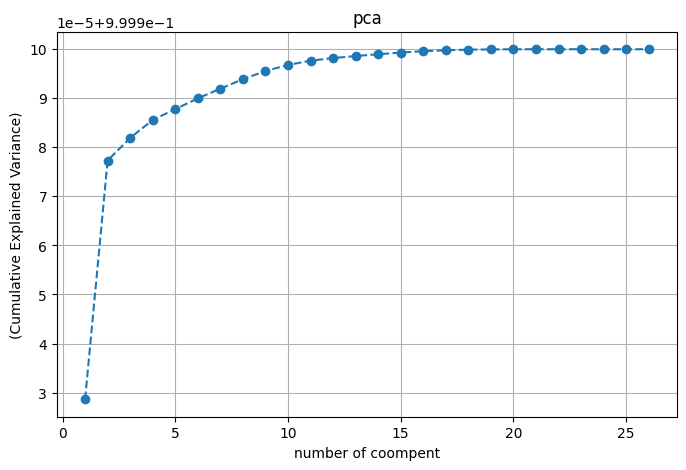

عدد المكونات التي تشرح 95% من التباين: 1


In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA().fit(clean_data_2)
cum_var = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o', linestyle='--')
plt.xlabel('number of coompent')
plt.ylabel('(Cumulative Explained Variance)')
plt.title('pca')
plt.grid(True)
plt.show()

# معرفة عدد المكونات المطلوبة للوصول إلى 95%
n_components_95 = np.argmax(cum_var >= 0.95) + 1
print("عدد المكونات التي تشرح 95% من التباين:", n_components_95)


In [ ]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(clean_data_2)
sum (pca.explained_variance_ratio_)


np.float64(0.9999855791535173)

In [ ]:
y_clean2

,Transported
0,False
1,True
3,False
4,True
5,True
...,...
8687,True
8689,False
8690,True
8691,False


In [ ]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
y_1=la.fit_transform(y_clean2)
y_1


array([0, 1, 0, ..., 1, 0, 1])

In [ ]:
data=pd.DataFrame( data=X_pca,columns=[1,2,3,4] )


In [ ]:
data

,1,2,3,4
0,-614.018124,-3.525759,-0.008620,0.900016
1,-614.017771,6.453370,0.764732,-0.875103
2,-614.019614,6.655823,-0.922212,-0.308068
3,-613.017526,6.594723,1.300522,-1.328897
4,-614.018036,1.332661,-1.156940,0.602833
...,...,...,...,...
8223,-517.019366,2.537828,-1.869375,-0.324282
8224,884.982644,-3.598333,-0.528904,-0.390935
8225,885.982581,0.002734,0.768428,-0.023655
8226,-6.020200,4.294911,-2.604343,-0.185769


-

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, y_1, test_size=0.2, random_state=42,stratify=y_1)
X_train

,1,2,3,4
7300,-307.018107,-3.650937,-0.112731,0.070877
1926,-267.016932,-3.704738,0.108245,-0.507416
5694,413.983117,-3.741263,-0.160930,-1.733070
6710,-368.018053,-3.658117,-0.052570,0.166892
2187,-443.017408,0.204742,1.904646,1.316803
...,...,...,...,...
3598,46.983244,-3.645684,0.108966,-1.736803
4779,-274.018464,1.175095,-1.096453,-0.258007
903,119.982405,3.743682,1.556882,0.042074
8049,1241.982339,3.254290,0.942575,-0.187071


In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_trains,y_trains=smote.fit_resample(X_train,y_train)

In [ ]:
X_trains.shape

(6726, 4)

In [ ]:
y_trains.shape

(6726,)

In [ ]:
X_train.shape

(6582, 4)

In [ ]:
X_test.shape

(1646, 4)

In [ ]:
y_train

array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
y_test

array([1, 0, 0, ..., 1, 1, 0])

In [ ]:
##modles1

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
pipe=Pipeline([
    ('scaler',StandardScaler()),
    ("logreg", LogisticRegression(max_iter=2000))
])
param_grid={
     "logreg__C": [0.01, 0.1, 1, 10, 100],
    "logreg__penalty": ["l1", "l2"],
    "logreg__solver": ["liblinear", "saga"]
}
modle1 = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

##modle1.fit(X_train,y_train)
modle1.fit(X_trains,y_trains)
y_prdict=modle1.predict(X_test)
accuracy=accuracy_score(y_prdict,y_test)
classfictaion=classification_report(y_prdict,y_test)
print(accuracy)
print( classfictaion)

0.7138517618469016
              precision    recall  f1-score   support

           0       0.74      0.69      0.72       864
           1       0.68      0.74      0.71       782

    accuracy                           0.71      1646
   macro avg       0.71      0.71      0.71      1646
weighted avg       0.72      0.71      0.71      1646



In [ ]:
## 2- model knn

In [ ]:
from sklearn.neighbors import  KNeighborsClassifier

KEN=KNeighborsClassifier(n_neighbors=200)
##KEN.fit(X_train,y_train)
KEN.fit(X_trains,y_trains)
predic_1=KEN.predict(X_test)
acrccey=accuracy_score(predic_1,y_test)
clascuff=classification_report(predic_1,y_test)
print(clascuff)
print(acrccey)

              precision    recall  f1-score   support

           0       0.63      0.61      0.62       833
           1       0.61      0.63      0.62       813

    accuracy                           0.62      1646
   macro avg       0.62      0.62      0.62      1646
weighted avg       0.62      0.62      0.62      1646

0.6196840826245443


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
cm=confusion_matrix(y_prdict,y_test)
print(cm)

[[599 265]
 [206 576]]


In [ ]:
##LightGBM

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
model_2=lgb.LGBMClassifier( n_estimators=500,
    learning_rate=0.05,
    max_depth=7,
    num_leaves=40,
    min_child_samples=30,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42)

In [ ]:
##model_2.fit(
   ## X_train,y_train
##)
model_2.fit(
    X_trains,y_trains
)

[LightGBM] [Info] Number of positive: 3363, number of negative: 3363
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000398 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 6726, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

LGBMClassifier(colsample_bytree=0.8, learning_rate=0.05, max_depth=7,
               min_child_samples=30, n_estimators=500, num_leaves=40,
               random_state=42, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8)

In [ ]:
light_test=model_2.predict(X_test)

In [ ]:
arecy=accuracy_score( light_test,y_test)
print(arecy)

0.7168894289185905


In [ ]:
from sklearn.metrics import f1_score
f1_score1=f1_score(light_test,y_test)
f1_score1

0.7101990049751243

In [ ]:
from sklearn.metrics import recall_score
recal=recall_score(light_test,y_test)
recal

0.7444589308996089

In [ ]:
confusion_matrix(light_test,y_test)

array([[609, 270],
       [196, 571]])

xgboot

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
from xgboost import XGBRFClassifier

In [ ]:
data

,1,2,3,4
0,-614.018124,-3.525759,-0.008620,0.900016
1,-614.017771,6.453370,0.764732,-0.875103
2,-614.019614,6.655823,-0.922212,-0.308068
3,-613.017526,6.594723,1.300522,-1.328897
4,-614.018036,1.332661,-1.156940,0.602833
...,...,...,...,...
8223,-517.019366,2.537828,-1.869375,-0.324282
8224,884.982644,-3.598333,-0.528904,-0.390935
8225,885.982581,0.002734,0.768428,-0.023655
8226,-6.020200,4.294911,-2.604343,-0.185769


In [ ]:
import torch

In [ ]:
print(type(X_trains))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
 # جرب استخدام  DATA الاصلية  CLEAN DATA

In [ ]:
clean_data_2

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,VIP,Cabin_num,TotalSpending,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,side_P,side_S
0,0.711945,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,0,0,0,-3.461005,...,0,1,0,0,0,0,0,0,1,0
1,-0.334037,1.344645,0.643952,1.075336,1.573323,1.135345,0,0,0,5.772601,...,0,0,0,0,0,1,0,0,0,1
3,0.293552,-0.680981,1.661185,1.660169,1.827129,1.444043,0,0,0,5.911545,...,1,0,0,0,0,0,0,0,0,1
4,-0.891895,1.535617,1.168097,1.493280,1.577835,0.171535,0,0,1,5.946364,...,0,0,0,0,0,1,0,0,0,1
5,1.060606,-0.680981,1.517895,-0.670153,1.468905,-0.690571,0,0,0,0.945094,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8687,0.084356,-0.680981,1.780895,-0.670153,0.135041,1.539175,0,0,97,2.103976,...,1,0,0,0,0,0,0,0,1,0
8689,-0.752431,-0.680981,-0.700012,-0.670153,-0.719288,-0.690571,1,0,1499,-3.461005,...,0,0,0,0,0,0,1,0,0,1
8690,-0.194573,-0.680981,-0.700012,1.913115,-0.112389,-0.690571,0,0,1500,-0.270838,...,0,0,0,0,0,0,1,0,0,1
8691,0.223820,-0.680981,1.633094,-0.670153,1.501671,1.875365,0,0,608,3.658994,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_trains,y_trains=smote.fit_resample(X_train,y_train)

decisontrreeclassifier

*   List item
*   List item



In [ ]:
from sklearn.tree import DecisionTreeClassifier
MODLE=DecisionTreeClassifier(random_state=42,max_depth=None)
MODLE.fit(X_trains,y_trains)
ypredict=MODLE.predict(X_test)
accuracy=accuracy_score(y_test,ypredict)
print(classification_report(y_test, ypredict))
print(f'accuracy{accuracy}')
print(confusion_matrix(y_test,ypredict))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66       805
           1       0.68      0.66      0.67       841

    accuracy                           0.67      1646
   macro avg       0.67      0.67      0.67      1646
weighted avg       0.67      0.67      0.67      1646

accuracy0.6652490886998785
[[539 266]
 [285 556]]


In [ ]:
##from sklearn.model_selection import StratifiedKFold, cross_val_score
##from imblearn.pipeline import Pipeline
##from imblearn.over_sampling import SMOTE
#from sklearn.ensemble import RandomForestClassifier

# إنشاء نموذج
#model = RandomForestClassifier(random_state=42)

# إعداد Pipeline لتطبيق SMOTE على التدريب فقط في كل fold
#pipeline = Pipeline([
 #   ('smote', SMOTE(random_state=42)),
  #  ('classifier', model)
#])

# إعداد K-Fold (stratified للحفاظ على توازن الفئات)
#skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# تقييم النموذج باستخدام cross-validation
#scores = cross_val_score(pipeline, X_train, y_train, cv=skf, scoring='f1')  # يمكن استخدام 'accuracy' أو 'roc_auc'

#print("F1-score لكل fold:", scores)
#print("F1-score متوسط:", scores.mean())


In [ ]:
my_model_x=XGBRFClassifier(n_estimators=1000,
    learning_rate=0.05,
      max_depth=4,
         subsample=0.8,           # استخدام 80% من العينات لكل شجرة
    colsample_bynode=0.8,
    n_jobs=4,)

In [ ]:
my_model_x.fit(X_trains,y_trains)

y_predi=my_model_x.predict(X_test)
accuracy_x=accuracy_score(y_predi,y_test)
print(accuracy_x)
print("Classification Report:")
print(classification_report(y_test, y_predi))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predi))


0.7266099635479951
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.80      0.74       805
           1       0.77      0.66      0.71       841

    accuracy                           0.73      1646
   macro avg       0.73      0.73      0.73      1646
weighted avg       0.73      0.73      0.73      1646

Confusion Matrix:
[[643 162]
 [288 553]]


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier (weak learner)
base_model = DecisionTreeClassifier(max_depth=2)  # You can adjust the 'max_depth' parameter for the weak learner

# Create an AdaBoost classifier
model7 = AdaBoostClassifier(base_model, n_estimators=80, random_state=42)  # You can adjust the 'n_estimators' parameter

# Train the model7 on the training data
model7.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = model7.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report and confusion matrix for more detailed evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7235722964763062
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.78      0.74       805
           1       0.76      0.67      0.71       841

    accuracy                           0.72      1646
   macro avg       0.73      0.72      0.72      1646
weighted avg       0.73      0.72      0.72      1646

Confusion Matrix:
[[631 174]
 [281 560]]


In [ ]:
# Install CatBoost if not already installed
!pip install catboost

from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a CatBoost classifier
model6 = CatBoostClassifier(random_state=42, verbose=0)

# Train the model6 on the training data
model6.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model6.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report and confusion matrix for more detailed evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7351154313487241
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.79      0.74       805
           1       0.77      0.68      0.73       841

    accuracy                           0.74      1646
   macro avg       0.74      0.74      0.73      1646
weighted avg       0.74      0.74      0.73      1646

Confusion Matrix:
[[634 171]
 [265 576]]


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Convert Cabin_num to numeric type
clean_data_2['Cabin_num'] = pd.to_numeric(clean_data_2['Cabin_num'], errors='coerce')
clean_data_2['Cabin_num'] = clean_data_2['Cabin_num'].fillna(clean_data_2['Cabin_num'].median())

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(clean_data_2, y_1, test_size=0.2, random_state=42)

# إنشاء النماذج الأساسية
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss', enable_categorical=True)
lr = LogisticRegression(max_iter=1000)

# إنشاء VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[('rf', rf), ('xgb', xgb), ('lr', lr)],
    voting='soft'  # 'soft' يعتمد على احتمالية التنبؤ لكل فئة
)

# تدريب النموذج
ensemble_model.fit(X_train, y_train)

# التنبؤ
y_pred = ensemble_model.predict(X_test)

# تقييم الأداء
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [00:36:53] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.79      0.81      0.80       831
           1       0.80      0.79      0.79       815

    accuracy                           0.80      1646
   macro avg       0.80      0.80      0.80      1646
weighted avg       0.80      0.80      0.80      1646



. Submission

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import f1_score

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

X_train_pca_split, X_test_pca_split, y_train_pca_split, y_test_pca_split = train_test_split(data, y_1, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss', enable_categorical=True)
lr_classifier = LogisticRegression(max_iter=1000)

new_ensemble_model_for_pipeline = VotingClassifier(
    estimators=[('rf', rf_classifier), ('xgb', xgb_classifier), ('lr', lr_classifier)],
    voting='soft'
)

pipeline = Pipeline(
    [('smote', SMOTE(random_state=42)),
    ('classifier', new_ensemble_model_for_pipeline)])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(pipeline, X_train_pca_split, y_train_pca_split, cv=skf, scoring='f1', n_jobs=-1)
print("F1-score لكل fold:", cv_scores)
print("F1-score متوسط:", cv_scores.mean())

pipeline.fit(X_train_pca_split, y_train_pca_split)


original_test_df = test.copy()


for col in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    original_test_df[col] = np.log1p(original_test_df[col])


processed_test_arr = preprocessor.transform(original_test_df)


processed_test_df = pd.DataFrame(processed_test_arr, index=original_test_df.index,
                                       columns=list(numeric_data_0) + list(categorical_data_0))


for col in ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    processed_test_df[col] = pd.to_numeric(processed_test_df[col], errors='coerce')


processed_test_df.drop(['Name', 'PassengerId'], axis=1, inplace=True)


processed_test_df[['Deck','Cabin_num','side']] = processed_test_df['Cabin'].astype(str).str.split("/",expand=True)
processed_test_df.drop('Cabin', axis=1, inplace=True)


processed_test_df['TotalSpending'] = processed_test_df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1)


processed_test_df['CryoSleep'] = processed_test_df['CryoSleep'].map({True:1,False:0}).fillna(0).astype(int)
processed_test_df['VIP'] = processed_test_df['VIP'].map({True:1,False:0}).fillna(0).astype(int)

processed_test_df_encoded = pd.get_dummies(processed_test_df, columns=categorical_cols)


bool_cols_test = processed_test_df_encoded.select_dtypes(include='bool').columns
processed_test_df_encoded[bool_cols_test] = processed_test_df_encoded[bool_cols_test].astype(int)

# Removed the extraneous '.' character that was causing the SyntaxError
if 'median_cabin_num_from_train' not in locals() and 'median_cabin_num_from_train' not in globals():
    median_cabin_num_from_train = pd.to_numeric(processed_test_df_encoded['Cabin_num'], errors='coerce').median()
processed_test_df_encoded['Cabin_num'] = pd.to_numeric(processed_test_df_encoded['Cabin_num'], errors='coerce').fillna(median_cabin_num_from_train)

reference_cols = clean_data_1.columns
X_competition_test_aligned = processed_test_df_encoded.reindex(columns=reference_cols, fill_value=0)

X_competition_test_pca = pca.transform(X_competition_test_aligned)


X_competition_test_final = pd.DataFrame(X_competition_test_pca, columns=data.columns)


y_competition_test_pred = pipeline.predict(X_competition_test_final)



submission = pd.DataFrame({
    "PassengerId": test['PassengerId'],
    "Transported": y_competition_test_pred
})
# Removed the extraneous 'n' character that was causing the SyntaxError
submission['Transported'] = submission['Transported'].astype(bool)

submission.to_csv("submission_1.csv", index=False)
print('yeaa')

F1-score لكل fold: [0.72248062 0.75229358 0.71175523 0.73307985 0.73201581]
F1-score متوسط: 0.730325017963296


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [00:53:26] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


yeaa
